In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [8]:
def download_price_data(tickers, start, end):
    all_tickers = tickers + ['^GSPC']
    data = yf.download(all_tickers, start=start, end=end)
    return data['Close']

def calculate_daily_returns(close_prices):
    return close_prices.pct_change().dropna()

def calculate_rolling_beta(daily_returns, tickers, benchmark_ticker, window=60):
    beta_values = {}
    for ticker in tickers:
        cov = daily_returns[benchmark_ticker].rolling(window).cov(daily_returns[ticker])
        var = daily_returns[benchmark_ticker].rolling(window).var()
        beta_values[ticker] = cov / var
    return pd.DataFrame(beta_values)

def add_momentum(close_prices, tickers, window=60):
    for ticker in tickers:
        close_prices[f'{ticker}_Mom_{window}d'] = close_prices[ticker].pct_change(periods=window)
    return close_prices

def add_zscore(close_prices, tickers, window=60):
    for ticker in tickers:
        mean = close_prices[ticker].rolling(window).mean()
        std = close_prices[ticker].rolling(window).std()
        close_prices[f'{ticker}_ZScore_{window}d'] = (close_prices[ticker] - mean) / std
    return close_prices

def add_skew_kurtosis(daily_returns, tickers, window=60):
    for ticker in tickers:
        daily_returns[f'{ticker}_Skew_{window}d'] = daily_returns[ticker].rolling(window).skew()
        daily_returns[f'{ticker}_Kurt_{window}d'] = daily_returns[ticker].rolling(window).kurt()
    return daily_returns


In [9]:
tickers = [
    'AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'TSLA', 'BRK-A', 'JPM', 'JNJ', 'V',
    'PG', 'UNH', 'HD', 'MA', 'BAC', 'XOM', 'NVDA', 'LLY', 'AVGO', 'COST',
    'PFE', 'MRK', 'ABT', 'TMO', 'CRM', 'CMCSA', 'VZ', 'ADBE', 'KO', 'PEP',
    'NKE', 'DIS', 'CSCO', 'INTC', 'ORCL', 'IBM', 'TXN', 'QCOM', 'AMGN', 'MDLZ',
    'SBUX', 'GE', 'LOW', 'RTX', 'CAT', 'BA', 'HON', 'DE', 'MMM', 'AXP'
]
benchmark_ticker = '^GSPC'

end_date = datetime.now()
start_date = end_date - timedelta(days=365)

close_prices = download_price_data(tickers, start_date, end_date)
daily_returns = calculate_daily_returns(close_prices)

rolling_beta_df = calculate_rolling_beta(daily_returns, tickers, benchmark_ticker)
print('\nRolling Beta (60 days):')
print(rolling_beta_df.tail())

close_prices = add_momentum(close_prices, tickers)
print(f'\nMomentum (60 days):\n{close_prices.filter(like="_Mom_").tail()}')

close_prices = add_zscore(close_prices, tickers)
print(f'\nNormalized Price (Z-Score over 60 days):\n{close_prices.filter(like="_ZScore_").tail()}')

daily_returns = add_skew_kurtosis(daily_returns, tickers)
print(f'\nSkewness and Kurtosis of Daily Returns (60 days):\n{daily_returns.filter(like="_Skew_").join(daily_returns.filter(like="_Kurt_")).tail()}')

rolling_volatility_df = add_rolling_volatility(daily_returns, tickers)
print('\nRolling Volatility (60 days):')
print(rolling_volatility_df.tail())

/tmp/ipython-input-8-1457894382.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, start=start, end=end)
[*********************100%***********************]  51 of 51 completed
/tmp/ipython-input-8-1457894382.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[f'{ticker}_Mom_{window}d'] = close_prices[ticker].pct_change(periods=window)
/tmp/ipython-input-8-1457894382.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[f'{ticker}_ZScore_


Rolling Beta (60 days):
                AAPL      MSFT      GOOG      AMZN      META      TSLA  \
Date                                                                     
2025-06-17  1.492949  0.898841  0.945029  1.335685  1.496377  2.184078   
2025-06-18  1.501546  0.908965  0.942145  1.327410  1.489146  2.125728   
2025-06-20  1.497408  0.909798  0.945898  1.328391  1.491053  2.124254   
2025-06-23  1.498746  0.909169  0.927472  1.317605  1.489546  2.128759   
2025-06-24  1.498203  0.908696  0.927336  1.322700  1.486588  2.116453   

               BRK-A       JPM       JNJ         V  ...      SBUX        GE  \
Date                                                ...                       
2025-06-17  0.613658  0.995555  0.128691  0.858091  ...  1.243318  1.184629   
2025-06-18  0.612520  0.988888  0.131603  0.853821  ...  1.268109  1.179105   
2025-06-20  0.611632  0.987925  0.132694  0.854131  ...  1.266436  1.176849   
2025-06-23  0.620003  0.993527  0.140136  0.861866  ...  1.27

/tmp/ipython-input-8-1457894382.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daily_returns[f'{ticker}_Skew_{window}d'] = daily_returns[ticker].rolling(window).skew()
/tmp/ipython-input-8-1457894382.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daily_returns[f'{ticker}_Kurt_{window}d'] = daily_returns[ticker].rolling(window).kurt()
/tmp/ipython-input-8-1457894382.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

/tmp/ipython-input-2-3817601870.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, start=start, end=end)
[*********************100%***********************]  51 of 51 completed
/tmp/ipython-input-2-3817601870.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[f'{ticker}_Mom_{window}d'] = close_prices[ticker].pct_change(periods=window)
/tmp/ipython-input-2-3817601870.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[f'{ticker}_ZScore


Rolling Beta (60 days):
                AAPL      MSFT      GOOG      AMZN      META      TSLA  \
Date                                                                     
2025-06-17  1.492949  0.898841  0.945029  1.335685  1.496377  2.184078   
2025-06-18  1.501546  0.908965  0.942145  1.327410  1.489146  2.125728   
2025-06-20  1.497408  0.909798  0.945898  1.328391  1.491053  2.124254   
2025-06-23  1.498746  0.909169  0.927472  1.317605  1.489546  2.128759   
2025-06-24  1.499070  0.908107  0.926071  1.322732  1.488727  2.125165   

               BRK-A       JPM       JNJ         V  ...      SBUX        GE  \
Date                                                ...                       
2025-06-17  0.613658  0.995555  0.128691  0.858091  ...  1.243318  1.184629   
2025-06-18  0.612520  0.988888  0.131603  0.853821  ...  1.268109  1.179105   
2025-06-20  0.611632  0.987925  0.132694  0.854131  ...  1.266436  1.176849   
2025-06-23  0.620003  0.993527  0.140136  0.861866  ...  1.27

/tmp/ipython-input-2-3817601870.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daily_returns[f'{ticker}_Kurt_{window}d'] = daily_returns[ticker].rolling(window).kurt()
/tmp/ipython-input-2-3817601870.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daily_returns[f'{ticker}_Skew_{window}d'] = daily_returns[ticker].rolling(window).skew()
/tmp/ipython-input-2-3817601870.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  


Skewness and Kurtosis of Daily Returns (60 days):
Ticker      AAPL_Skew_60d  MSFT_Skew_60d  GOOG_Skew_60d  AMZN_Skew_60d  \
Date                                                                     
2025-06-17       1.362058       2.060556       0.356513       0.750012   
2025-06-18       1.375549       2.060687       0.422626       0.826345   
2025-06-20       1.355350       2.076472       0.455642       0.865931   
2025-06-23       1.337957       2.023597       0.464609       0.857757   
2025-06-24       1.366337       2.018922       0.415721       0.812225   

Ticker      META_Skew_60d  TSLA_Skew_60d  BRK-A_Skew_60d  JPM_Skew_60d  \
Date                                                                     
2025-06-17       1.032993       0.878652       -0.868980     -0.483514   
2025-06-18       1.104148       0.904541       -0.863241     -0.490443   
2025-06-20       1.138273       0.943803       -0.859466     -0.474587   
2025-06-23       1.083927       0.871601       -0.853316    

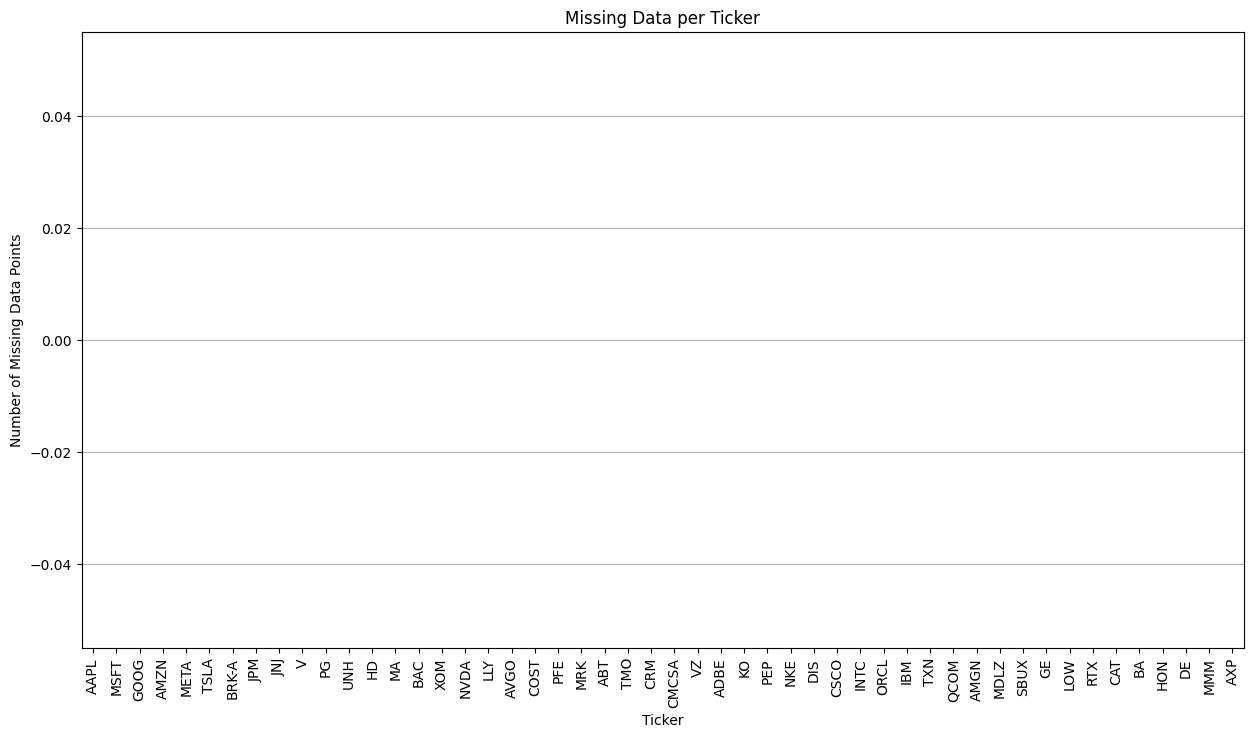

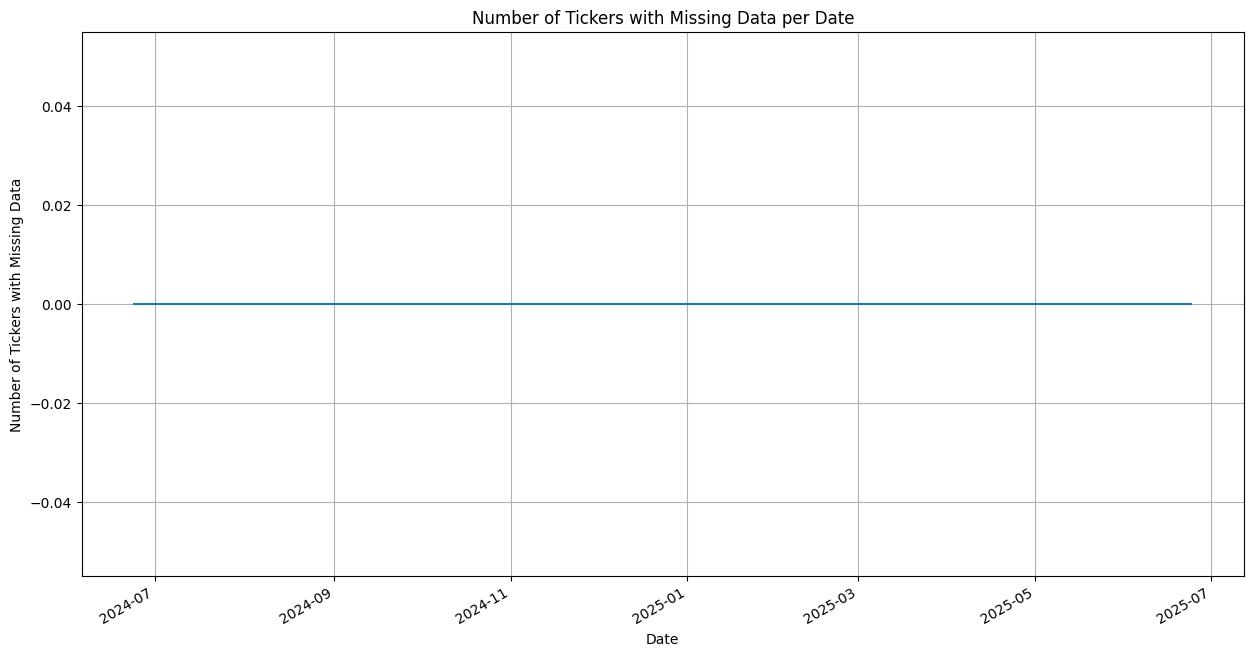

In [2]:
# prompt: I want to visualize wheter I now have data for all my tickers

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
close_prices[tickers].isnull().sum().plot(kind='bar')
plt.title('Missing Data per Ticker')
plt.xlabel('Ticker')
plt.ylabel('Number of Missing Data Points')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(15, 8))
close_prices[tickers].isnull().sum(axis=1).plot()
plt.title('Number of Tickers with Missing Data per Date')
plt.xlabel('Date')
plt.ylabel('Number of Tickers with Missing Data')
plt.grid(True)
plt.show()

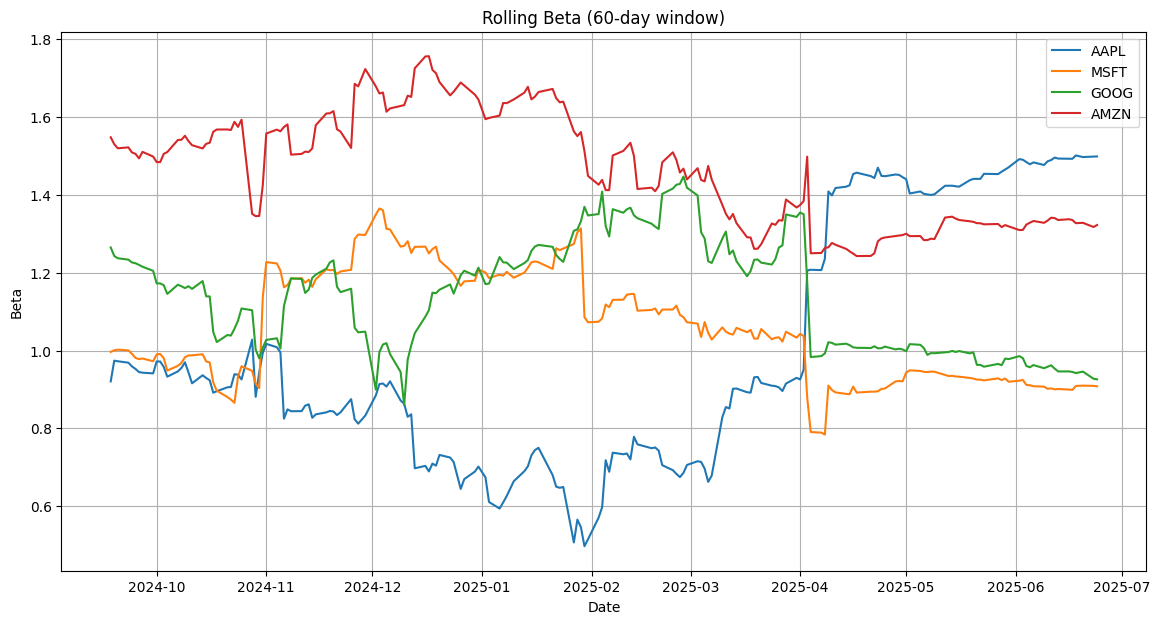

In [3]:
# prompt: I want to plot my beta's

import matplotlib.pyplot as plt
# Plot rolling betas for a few tickers as an example
tickers_to_plot = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
plt.figure(figsize=(14, 7))
for ticker in tickers_to_plot:
    plt.plot(rolling_beta_df.index, rolling_beta_df[ticker], label=ticker)

plt.title('Rolling Beta (60-day window)')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.grid(True)
plt.show()

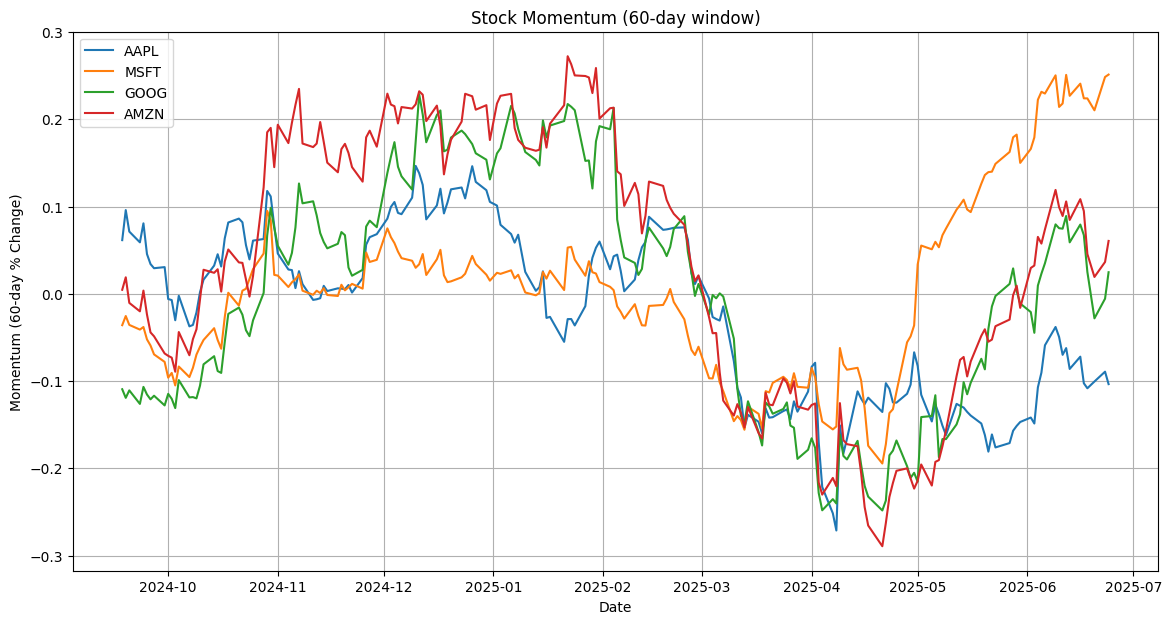

In [4]:
# prompt: for tickers ['AAPL', 'MSFT', 'GOOG', 'AMZN'] i want to plot momentum

import matplotlib.pyplot as plt
tickers_to_plot = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
plt.figure(figsize=(14, 7))
for ticker in tickers_to_plot:
    # Assuming add_momentum has already been called and 'close_prices' dataframe
    # contains columns like 'AAPL_Mom_60d', 'MSFT_Mom_60d', etc.
    momentum_col = f'{ticker}_Mom_60d' # Default window is 60 in add_momentum
    if momentum_col in close_prices.columns:
      plt.plot(close_prices.index, close_prices[momentum_col], label=ticker)
    else:
      print(f"Momentum column '{momentum_col}' not found for ticker {ticker}")


plt.title('Stock Momentum (60-day window)')
plt.xlabel('Date')
plt.ylabel('Momentum (60-day % Change)')
plt.legend()
plt.grid(True)
plt.show()

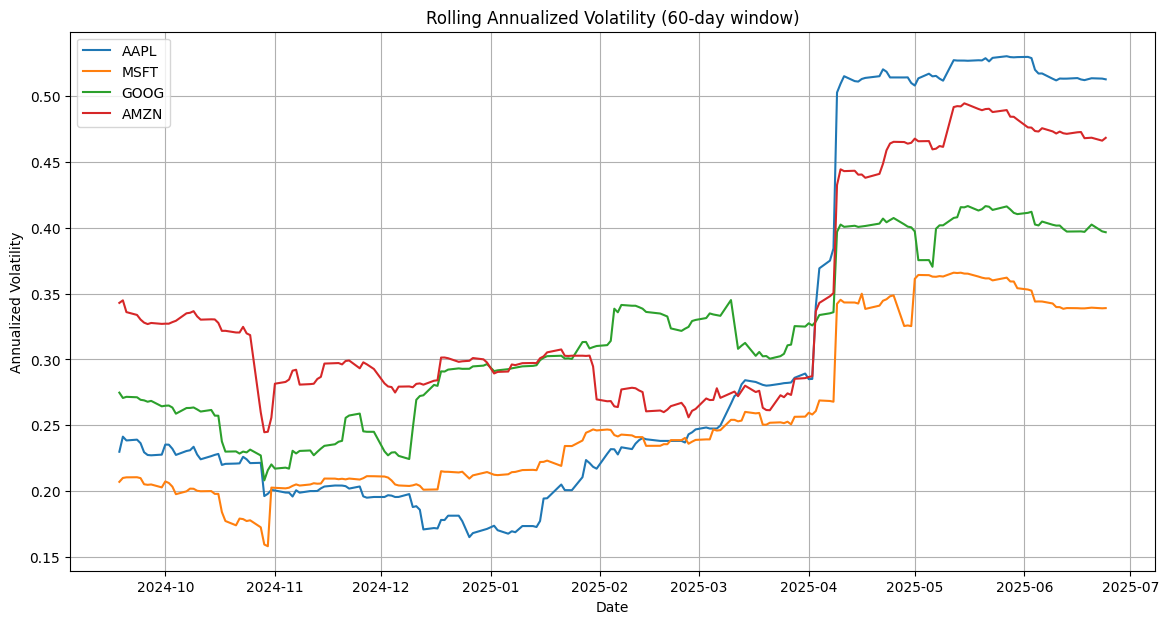

In [10]:
# prompt: for tickers ['AAPL', 'MSFT', 'GOOG', 'AMZN'] i want to plot volatility

import pandas as pd
import matplotlib.pyplot as plt
def add_rolling_volatility(daily_returns, tickers, window=60):
    volatility_values = {}
    for ticker in tickers:
        # Volatility is the rolling standard deviation of daily returns
        volatility_values[ticker] = daily_returns[ticker].rolling(window).std() * (252**0.5) # Annualize
    return pd.DataFrame(volatility_values)

# Add this function call before the plot
rolling_volatility_df = add_rolling_volatility(daily_returns, tickers)

# Plot rolling volatility for the specified tickers
tickers_to_plot = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
plt.figure(figsize=(14, 7))
for ticker in tickers_to_plot:
    if ticker in rolling_volatility_df.columns:
        plt.plot(rolling_volatility_df.index, rolling_volatility_df[ticker], label=ticker)
    else:
        print(f"Volatility data not found for ticker {ticker}")

plt.title('Rolling Annualized Volatility (60-day window)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.show()

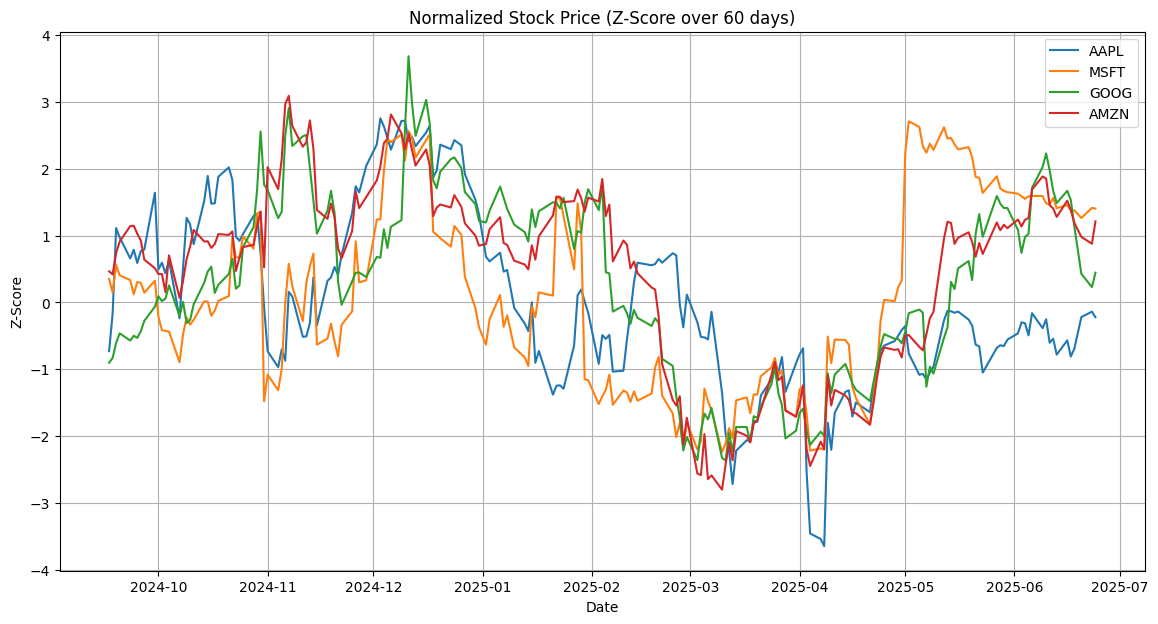

In [5]:
# prompt: for tickers ['AAPL', 'MSFT', 'GOOG', 'AMZN'] i want to plot normalized price

import matplotlib.pyplot as plt
# Define the tickers to plot
tickers_to_plot = ['AAPL', 'MSFT', 'GOOG', 'AMZN']

# Plot normalized price (Z-Score) for the specified tickers
plt.figure(figsize=(14, 7))
for ticker in tickers_to_plot:
    # Assuming add_zscore has already been called and 'close_prices' dataframe
    # contains columns like 'AAPL_ZScore_60d', 'MSFT_ZScore_60d', etc.
    zscore_col = f'{ticker}_ZScore_60d' # Default window is 60 in add_zscore
    if zscore_col in close_prices.columns:
      plt.plot(close_prices.index, close_prices[zscore_col], label=ticker)
    else:
      print(f"Normalized price column '{zscore_col}' not found for ticker {ticker}")

plt.title('Normalized Stock Price (Z-Score over 60 days)')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()


Features used for AAPL KNN signal generation: ['AAPL_Beta_60d', 'AAPL_Mom_60d', 'AAPL_Vol_60d', 'AAPL_Skew_60d', 'AAPL_Kurt_60d', 'AAPL']
Target column: AAPL_ZScore_60d

KNN Signal for AAPL:
            Predicted  Deviation  Signal
Date                                    
2025-06-17  -0.701647  -0.109362     0.0
2025-06-18  -0.701647   0.008954     0.0
2025-06-20  -0.546168   0.326203     0.0
2025-06-23  -0.445934   0.307758     0.0
2025-06-24  -0.546168   0.441438     0.0


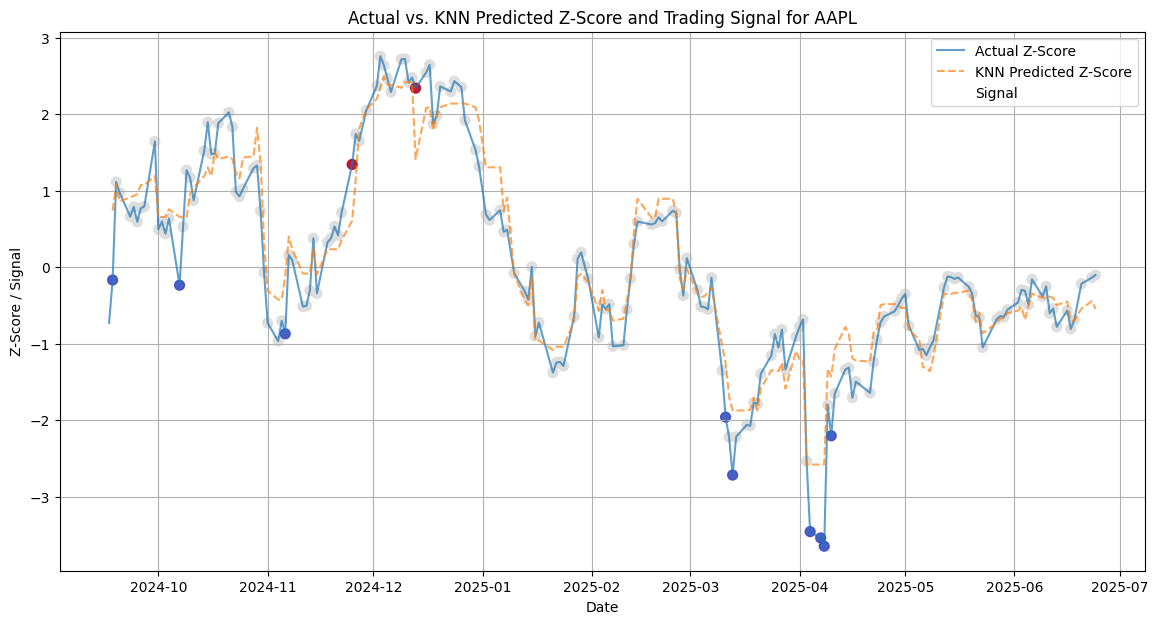

In [11]:
# prompt: using knn i want to develop a signal on when tickers show deviasion or conversion to the mean

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def generate_knn_signal(data, target_col, feature_cols, n_neighbors=5, threshold=0.5):
    """
    Generates a trading signal based on K-Nearest Neighbors regression.

    Predicts the target variable using KNN and generates a signal when the
    absolute difference between the actual value and the predicted value
    exceeds a threshold.

    Args:
        data (pd.DataFrame): The input DataFrame containing features and target.
        target_col (str): The name of the column to predict.
        feature_cols (list): A list of column names to use as features.
        n_neighbors (int): Number of neighbors to use for KNN.
        threshold (float): The deviation threshold to trigger a signal.

    Returns:
        pd.DataFrame: A DataFrame with the original data and a 'Signal' column
                      (1 for buy/deviation above, -1 for sell/deviation below, 0 for no signal).
    """
    df_clean = data.dropna(subset=feature_cols + [target_col]).copy()

    if df_clean.empty:
        print("Warning: No data after dropping NaNs for the specified columns.")
        return pd.DataFrame(columns=data.columns.tolist() + ['Signal'])

    X = df_clean[feature_cols]
    y = df_clean[target_col]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data (optional, but good practice)
    # For time series, a simple train/test split might not be ideal,
    # but for a basic demonstration, we can use it or just fit on the whole data.
    # Let's fit on the whole data for simplicity in generating signals for all dates.

    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_scaled, y)

    # Predict on the scaled data
    df_clean['Predicted'] = knn.predict(X_scaled)

    # Calculate the deviation
    df_clean['Deviation'] = df_clean[target_col] - df_clean['Predicted']

    # Generate the signal
    # Signal 1: Actual is significantly above predicted (deviation above mean)
    # Signal -1: Actual is significantly below predicted (deviation below mean)
    # Signal 0: Within the threshold
    df_clean['Signal'] = 0
    df_clean.loc[df_clean['Deviation'] > threshold, 'Signal'] = 1
    df_clean.loc[df_clean['Deviation'] < -threshold, 'Signal'] = -1

    # Merge the signal back to the original dataframe (to keep dates where NaNs were present initially)
    return data.join(df_clean[['Predicted', 'Deviation', 'Signal']])

# --- Example Usage with the existing data ---

# Let's choose one ticker and a set of features.
# We will try to predict the Z-Score (deviation from the mean)
# using other features like Beta, Momentum, Volatility, Skewness, and Kurtosis.
# The signal will then be generated when the actual Z-Score deviates significantly from the KNN predicted Z-Score.

target_ticker = 'AAPL'
target_column = f'{target_ticker}_ZScore_60d' # The column we want to predict

# Combine relevant dataframes for modeling.
# Ensure they are aligned by index (Date).
# We'll use daily_returns for skew/kurtosis and close_prices for zscore/momentum/price.
# rolling_beta_df and rolling_volatility_df are also aligned by date.

# Start with close_prices which contains zscore and momentum
model_data = close_prices.filter(like=target_ticker).copy()

# Add beta for the target ticker
if target_ticker in rolling_beta_df.columns:
    model_data = model_data.join(rolling_beta_df[target_ticker].rename(f'{target_ticker}_Beta_60d'))

# Add volatility for the target ticker
if target_ticker in rolling_volatility_df.columns:
    model_data = model_data.join(rolling_volatility_df[target_ticker].rename(f'{target_ticker}_Vol_60d'))

# Add skew and kurtosis for the target ticker
if f'{target_ticker}_Skew_60d' in daily_returns.columns:
    model_data = model_data.join(daily_returns[[f'{target_ticker}_Skew_60d', f'{target_ticker}_Kurt_60d']])


# Define features to use for the KNN model
# Ensure these columns actually exist after joining
feature_columns = [col for col in [
    f'{target_ticker}_Beta_60d',
    f'{target_ticker}_Mom_60d',
    f'{target_ticker}_Vol_60d',
    f'{target_ticker}_Skew_60d',
    f'{target_ticker}_Kurt_60d',
    f'{target_ticker}' # Using the raw price as a feature might also be relevant
] if col in model_data.columns]

print(f"\nFeatures used for {target_ticker} KNN signal generation: {feature_columns}")
print(f"Target column: {target_column}")

# Check if target column exists
if target_column not in model_data.columns:
    print(f"Error: Target column '{target_column}' not found in the combined data.")
else:
    # Generate the KNN signal
    # We need to choose a threshold for deviation. This requires domain knowledge or tuning.
    # A threshold of 0.5 means a deviation of 0.5 standard deviations from the KNN prediction triggers a signal.
    knn_signal_df = generate_knn_signal(
        model_data,
        target_col=target_column,
        feature_cols=feature_columns,
        n_neighbors=10, # You can tune this
        threshold=0.7 # You can tune this threshold
    )

    # Display the results
    print(f"\nKNN Signal for {target_ticker}:")
    print(knn_signal_df[['Predicted', 'Deviation', 'Signal']].tail())

    # Plot the actual Z-Score, predicted Z-Score, and the signal
    plt.figure(figsize=(14, 7))
    plt.plot(knn_signal_df.index, knn_signal_df[target_column], label='Actual Z-Score', alpha=0.7)
    plt.plot(knn_signal_df.index, knn_signal_df['Predicted'], label='KNN Predicted Z-Score', alpha=0.7, linestyle='--')
    plt.scatter(knn_signal_df.index, knn_signal_df[target_column],
                c=knn_signal_df['Signal'], cmap='coolwarm', s=50, label='Signal', alpha=0.9)

    plt.title(f'Actual vs. KNN Predicted Z-Score and Trading Signal for {target_ticker}')
    plt.xlabel('Date')
    plt.ylabel('Z-Score / Signal')
    plt.legend()
    plt.grid(True)
    plt.show()

    # You can iterate this process for each ticker in your list
    # for ticker in tickers:
    #     target_column = f'{ticker}_ZScore_60d'
    #     # ... (define feature_columns for the current ticker) ...
    #     # model_data for the current ticker
    #     knn_signal_df = generate_knn_signal(model_data_current_ticker, target_column, feature_columns)
    #     print(f"\nKNN Signal for {ticker}:")
    #     print(knn_signal_df[['Signal']].tail())
    #     # ... (possibly store or combine signals) ...
